<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Linear Regression Multiple Outputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using pytorch build in functions.</li></ul> 


<h2>Table of Contents</h2>
In this lab, you will create a model the Pytroch way. This will help you as models get more complicated.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data</a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way</a></li>
<li><a href="#ref2">Train the Model: Batch Gradient Descent</a></li>
<li><a href="#ref3">Practice Questions </a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>


Import the following libraries:  


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

Set the random seed:


In [2]:
torch.manual_seed(1)

<a id="ref0"></a>

<h2 align=center>Make Some Data </h2>
Create a dataset class with two-dimensional features and two targets: 


In [3]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

create a dataset object 


In [4]:
data_set=Data()

<a id="ref1"></a>

<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


Create a custom module:


In [5]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


In [6]:
model=linear_regression(2,2)

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">


In [7]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:


In [8]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:


In [9]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>

<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [11]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     


    

Plot the cost:


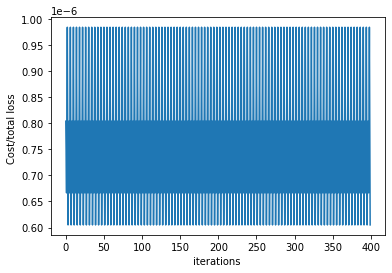

In [12]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

<a href="https://dataplatform.cloud.ibm.com/registration/stepone?context=cpdaas&apps=data_science_experience,watson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"/></a>


### About the Authors:

 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](https://www.linkedin.com/in/michelleccarey?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) 


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-23        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
